In [1]:
#1.Conceptualization / Logic applied:

#The conceptualization of the problem involves building a binary classification model to predict the risk of readmission for patients after they are discharged from the hospital. This is a supervised learning task where the target variable is binary (1 for readmission, 0 for no readmission).
#The dataset is loaded and preprocessed. Categorical variables (in this case, 'SEX') are one-hot encoded, and the target variable is mapped to binary values ('in' mapped to 1, 'out' mapped to 0).
#The data is split into training and testing sets for model evaluation. Standardization is applied to the feature variables.
#A neural network model is defined with two hidden layers using the Sequential API from TensorFlow/Keras. ReLU activation functions are used in the hidden layers, and a sigmoid activation function is used in the output layer for binary classification.
#The model is compiled with the binary cross-entropy loss function and the Adam optimizer.
#Early stopping is implemented to monitor validation accuracy and prevent overfitting.

#2.Usage of Frameworks:

#Pandas is used for data manipulation and preprocessing.
#Scikit-learn is used for splitting the data and standardizing the features.
#TensorFlow and Keras are used for building and training the neural network model.
#NumPy is not explicitly mentioned but is likely used for array operations.

#3.Dataset / Preprocessing / Data preparation:

#The dataset is assumed to be stored in a CSV file named 'data-ori.csv'.
#The data is loaded into a pandas DataFrame using pd.read_csv.
#The target variable ('SOURCE') is separated from the feature variables ('SEX' and other columns) and one-hot encoded using pd.get_dummies.
#The target variable is then converted to numeric format using a mapping.
#The data is split into training and testing sets using train_test_split from scikit-learn.
#The feature variables are standardized using StandardScaler.

#4.Model development / solution / Accuracy:

#The neural network model architecture consists of an input layer with the number of features, two hidden layers with 128 and 64 units respectively, and an output layer with 1 unit (binary classification).
#The model is compiled with the Adam optimizer and binary cross-entropy loss function.
#Early stopping is implemented to monitor validation accuracy and stop training if it doesn't improve for a certain number of epochs.
#The model is trained on the training data using model.fit.
#After training, the model is evaluated on the test data. The accuracy and a classification report (including precision, recall, F1-score, etc.) are printed.

#5.Visualization
#Training and Validation Loss:
#Plot the training and validation loss over epochs to visualize how well the model is learning and if it is overfitting.

#Training and Validation Accuracy:
#Plot the training and validation accuracy over epochs to see how well the model is performing on the training and validation sets.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('data-ori.csv')

# Data Preprocessing
X = data.drop(columns=['SOURCE'])  # Features
y = data['SOURCE']  # Target variable

# Encode categorical variables (SEX)
X = pd.get_dummies(X, columns=['SEX'], drop_first=True)

# Convert target variable to numeric format
y = y.map({'in': 1, 'out': 0})  # Assuming 'in' indicates readmission and 'out' indicates no readmission

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                  patience=10, 
                                                  mode='max', 
                                                  restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=32, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping],
          verbose=1)
# Train the model
#model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)

# Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Epoch 1/500
111/111 [==============================] - 1s 6ms/step - loss: 0.5845 - accuracy: 0.7078 - val_loss: 0.5420 - val_accuracy: 0.7486
Epoch 2/500
111/111 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7492 - val_loss: 0.5336 - val_accuracy: 0.7418
Epoch 3/500
111/111 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7487 - val_loss: 0.5244 - val_accuracy: 0.7316
Epoch 4/500
111/111 [==============================] - 0s 4ms/step - loss: 0.5175 - accuracy: 0.7623 - val_loss: 0.5246 - val_accuracy: 0.7463
Epoch 5/500
111/111 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.7563 - val_loss: 0.5327 - val_accuracy: 0.7407
Epoch 6/500
111/111 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7574 - val_loss: 0.5279 - val_accuracy: 0.7418
Epoch 7/500
111/111 [==============================] - 1s 5ms/step - loss: 0.5056 - accuracy: 0.7640 - val_loss: 0.5257 - val_accuracy: 0.7350

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('data-ori.csv')

# Data Preprocessing
X = data.drop(columns=['SOURCE'])  # Features
y = data['SOURCE']  # Target variable

# Encode categorical variables (SEX)
X = pd.get_dummies(X, columns=['SEX'], drop_first=True)

# Convert target variable to numeric format
y = y.map({'in': 1, 'out': 0})  # Assuming 'in' indicates readmission and 'out' indicates no readmission

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Epoch 1/50
111/111 [==============================] - 3s 5ms/step - loss: 0.6166 - accuracy: 0.6838
Epoch 2/50
111/111 [==============================] - 1s 6ms/step - loss: 0.5469 - accuracy: 0.7393
Epoch 3/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5302 - accuracy: 0.7475
Epoch 4/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5230 - accuracy: 0.7532
Epoch 5/50
111/111 [==============================] - 0s 4ms/step - loss: 0.5208 - accuracy: 0.7455
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5156 - accuracy: 0.7574
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.5146 - accuracy: 0.7518
Epoch 8/50
111/111 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.7555
Epoch 9/50
111/111 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7572
Epoch 10/50
111/111 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.7623

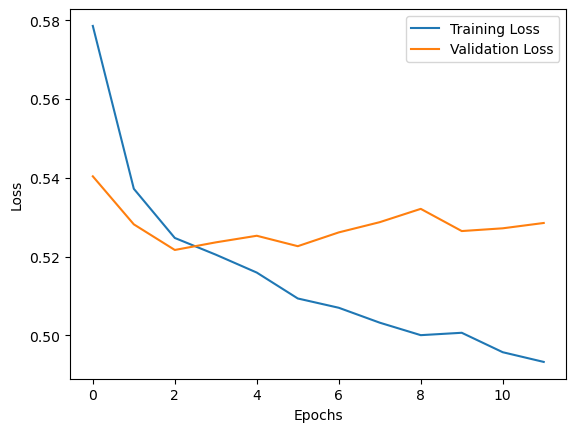

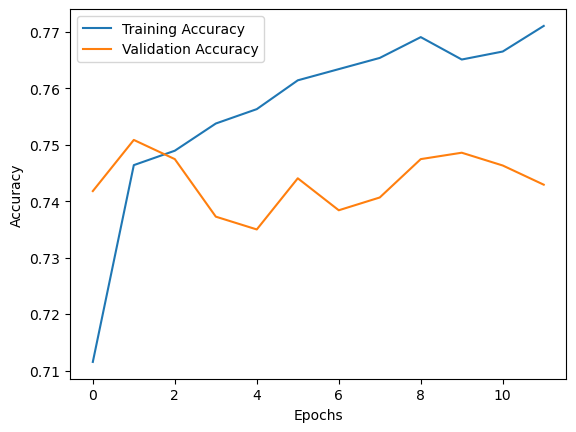

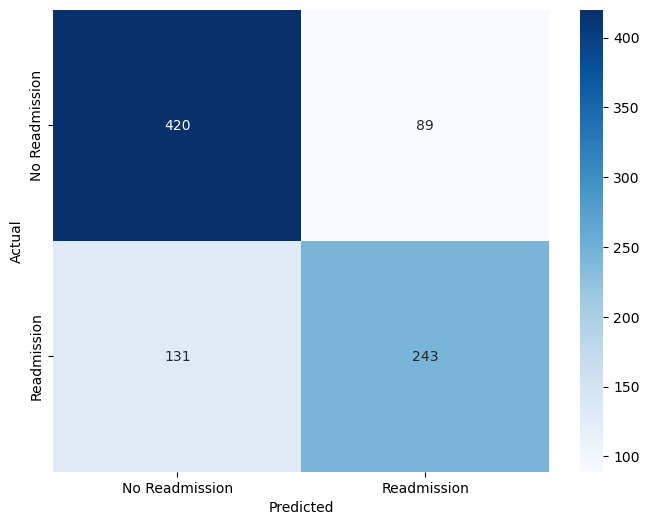

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Readmission', 'Readmission'],
            yticklabels=['No Readmission', 'Readmission'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()